# TEBD Simulation of Spin-Boson model

- In "TEBD.jl" per calcolare il valore di aspettazione "converto" Vidal in left-canonical MPS, forse è un overkill: decisamente SI

In [4]:
import Pkg
Pkg.activate("work1.11.3")
#Pkg.instantiate()

  Activating project at `~/Desktop/ProgettiInCorso/LookAtIt_202502/TEBD/thesis/work1.11.3`


In [7]:
using ITensors, ITensorMPS
using DelimitedFiles

#ITensors.set_warn_order(110)
Pkg.status()

Status `~/Desktop/ProgettiInCorso/LookAtIt_202502/TEBD/thesis/work1.11.3/Project.toml`
  [336ed68f] CSV v0.10.15
  [0d1a4710] ITensorMPS v0.3.7
  [9136182c] ITensors v0.8.0
  [de52edbc] Integrals v4.5.0
  [338f10d5] Observers v0.2.5
  [91a5bcdd] Plots v1.40.9
  [8d666b04] PolyChaos v0.2.11
  [92933f4c] ProgressMeter v1.10.2


In [3]:
a = Array{ITensor}(undef,10)

10-element Vector{ITensor}:
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef

Importing stuff

In [6]:
include("Lib/chainCoe.jl")
include("Lib/convert_to_Vidal.jl") # funziona solo se conserve_qns=false
include("Lib/TEBD_alt.jl")

convert_to_MPS (generic function with 1 method)

### Parameters

In [7]:
#System:

ϵ = -200 #-200/2 σz = -100 σz

 #ϵ/2 σ_z
Δ = 100 #Δ/2 σ_x

#Chain
chain_size = 400 #400 hosc
local_dim = 6 #local dimension

#Times

#Integration step
τ=1 / 1000 / 50
#Simulation time
tmax=0.2
#Measurement graining
mStep = 10

#MPS pars
minBondDim = 10


10

### Caricamento coefficienti della catena da file

In [8]:
#generateChainCoefficients(sysEnergy = e, SpectralDensityInterval = domain)
freqs = readdlm("Data/FMO_T77_freqs.dat",'\n' ,Float64); #chain fequencies
coups = readdlm("Data/FMO_T77_coups.dat",'\n',Float64);  #chain couplings; first element:sys-bath coupling
println(length(freqs))
println(length(coups))

501
501


### Define MPS and convert to Vidal form

NOTA: 
- Manca il controllo ortogonalità dei siti -> controllato vedi "VidalMain"

In [11]:
# Make an array of 'site' indices
# s = siteinds("S=1/2", N+1)
# # Initialize psi to be a product state (|10000000....0>)
# psi = MPS(s, n -> n == 1 ? "Up" : "Dn")
# display(psi.rlim)
# norm(psi)
sys = siteinds("S=1/2",1);
env = [Index(local_dim,"Boson,Site,n=$(i+1)") for i in 1:chain_size]
#env = siteinds("Boson",dim = local_dim, chain_size);
println(tags(env[1]))
sysenv = vcat(sys,env);

stateSys = ["Up"]   

#Standard approach: chain always in the vacuum state
stateEnv = ["0" for n=1:chain_size];

stateSE = vcat(stateSys,stateEnv);

psi0 = productMPS(ComplexF64,sysenv,stateSE);
psi = psi0;

"Boson,Site,n=2"


In [ ]:
psi0;
a=[1,-1]


MPS
[1] ((dim=2|id=193|"S=1/2,Site,n=1"), (dim=1|id=126|"Link,l=1"))
[2] ((dim=6|id=402|"Boson,Site,n=2"), (dim=1|id=291|"Link,l=2"), (dim=1|id=126|"Link,l=1"))
[3] ((dim=6|id=374|"Boson,Site,n=3"), (dim=1|id=927|"Link,l=3"), (dim=1|id=291|"Link,l=2"))
[4] ((dim=6|id=716|"Boson,Site,n=4"), (dim=1|id=367|"Link,l=4"), (dim=1|id=927|"Link,l=3"))
[5] ((dim=6|id=186|"Boson,Site,n=5"), (dim=1|id=269|"Link,l=5"), (dim=1|id=367|"Link,l=4"))
[6] ((dim=6|id=553|"Boson,Site,n=6"), (dim=1|id=765|"Link,l=6"), (dim=1|id=269|"Link,l=5"))
[7] ((dim=6|id=599|"Boson,Site,n=7"), (dim=1|id=230|"Link,l=7"), (dim=1|id=765|"Link,l=6"))
[8] ((dim=6|id=608|"Boson,Site,n=8"), (dim=1|id=294|"Link,l=8"), (dim=1|id=230|"Link,l=7"))
[9] ((dim=6|id=685|"Boson,Site,n=9"), (dim=1|id=200|"Link,l=9"), (dim=1|id=294|"Link,l=8"))
[10] ((dim=6|id=712|"Boson,Site,n=10"), (dim=1|id=839|"Link,l=10"), (dim=1|id=200|"Link,l=9"))
[11] ((dim=6|id=768|"Boson,Site,n=11"), (dim=1|id=398|"Link,l=11"), (dim=1|id=839|"Link,l=10"))
[12]

In [40]:
Lambdas, Gammas = convert_to_Vidal(psi)
@show length(Lambdas)
@show length(Gammas)

length(Lambdas) = 100
length(Gammas) = 101


101

# To Measurement

In [41]:
#appo = noprime!(2*op("Sz",sysenv[1])*Gammas[1])*Lambdas[1]*Lambdas[1]*conj(Gammas[1])
#@show appo


In [42]:
# appo = Lambdas[1]*noprime!(op("N",sysenv[2])*Gammas[2])*Lambdas[2]*Lambdas[2]*conj(Gammas[2])*Lambdas[1]
# @show appo
# scalar(appo)


In [43]:
println("canonical 1: ",sysenv[1])
println("vidal 1: ",Gammas[1])
println("canonical 2: ",sysenv[2])
println("vidal 2: ",Gammas[2])


canonical 1: (dim=2|id=193|"S=1/2,Site,n=1")
vidal 1: ITensor ord=2
Dim 1: (dim=2|id=193|"S=1/2,Site,n=1")
Dim 2: (dim=1|id=875|"u=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×1
 1.0 + 0.0im
 0.0 + 0.0im
canonical 2: (dim=6|id=402|"Boson,Site,n=2")
vidal 2: ITensor ord=3
Dim 1: (dim=1|id=632|"v=1")
Dim 2: (dim=6|id=402|"Boson,Site,n=2")
Dim 3: (dim=1|id=278|"u=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 1×6×1
[:, :, 1] =
 1.0 + 0.0im  0.0 + 0.0im  0.0 + 0.0im  0.0 + 0.0im  0.0 + 0.0im  0.0 + 0.0im


In [44]:
#Check that it is indeed a product state
for lambda in Lambdas
    if(dims(lambda) != (1,1)) println("error!") end
    if(lambda[1] != 1.0) println("error!")  end
end
#=
for lambda in Lambdas
    println(lambda)
end
for gamma in Gammas
    println(gamma)
end=#

### Controllo per capire se le rappresentazioni si corrispondono
> ATTENZIONE: non usare se i siti sono più di 20!!!

In [45]:
# Contract all tensors in the MPS into a single ITensor
# full_tensor = psi[1]
# for i in 2:length(psi)
#     full_tensor *= psi[i]
# end

# println("Full ITensor representing the MPS:")
# println(inds(full_tensor))

# full_tensor_Vidal = Gammas[1]
# for i in 1:length(Lambdas)
#     full_tensor_Vidal *= Lambdas[i]*Gammas[i+1]
# end

# println("Full ITensor in Vidal representing the MPS:")
# println(inds(full_tensor_Vidal))

# @show full_tensor_Vidal == full_tensor #funziona solo con il product state, altrimenti usare ≈
# @show norm(full_tensor_Vidal)
# @show norm(psi)

In [46]:
@show op("Sz",sysenv[1])

op("Sz", sysenv[1]) = ITensor ord=2
Dim 1: (dim=2|id=193|"S=1/2,Site,n=1")'
Dim 2: (dim=2|id=193|"S=1/2,Site,n=1")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2
 0.5   0.0
 0.0  -0.5


ITensor ord=2 (dim=2|id=193|"S=1/2,Site,n=1")' (dim=2|id=193|"S=1/2,Site,n=1")
NDTensors.Dense{Float64, Vector{Float64}}

## Evoluzione tramite TEBD (non in parallelo per ora)

In [47]:
sysenv[1]

(dim=2|id=193|"S=1/2,Site,n=1")

In [48]:
include("Lib/TEBD_alt.jl")

convert_to_MPS (generic function with 1 method)

In [55]:
# PsiVector,GammasV,LambdasV = MPS_evolution_TEBD(Gammas, Lambdas,sysenv ;
# sysEnergy=ϵ, 
# ChainLength=chain_size, 
# tau=τ, 
# ttotal=tmax, 
# freqs=freqs, 
# coups=coups, 
# minBondDim=minBondDim, 
# cutoff=1E-13)
# println(length(PsiVector))
include("Lib/TEBD_alt.jl")
psi=psi0
Lambdas, Gammas = convert_to_Vidal(psi)
SpinBoson_evolution_TEBD(Gammas, Lambdas, sysenv;
ϵ=ϵ,
Δ=0., 
sysenvInt="X",
ChainLength=chain_size, 
tau=τ, 
ttotal=tmax, 
freqs=freqs, 
coups=coups, 
minBondDim=5, 
cutoff=1E-13)

ChainLength 101
length lambda 100
first value of exp Z: 1.0 + 0.0im
tempo: 0.0
tempo: 2.0e-5
tempo: 4.0e-5
tempo: 6.0e-5
tempo: 8.0e-5
tempo: 0.0001
tempo: 0.00012
tempo: 0.00014
tempo: 0.00016
tempo: 0.00018
tempo: 0.0002
tempo: 0.00022
tempo: 0.00024
tempo: 0.00026
tempo: 0.00028
tempo: 0.0003
tempo: 0.00032
tempo: 0.00034
tempo: 0.00036
tempo: 0.00038
tempo: 0.0004
tempo: 0.00042
tempo: 0.00044
tempo: 0.00046
tempo: 0.00048
tempo: 0.0005
tempo: 0.00052
tempo: 0.00054
tempo: 0.00056
tempo: 0.00058
tempo: 0.0006
tempo: 0.00062
tempo: 0.00064
tempo: 0.00066
tempo: 0.00068
tempo: 0.0007
tempo: 0.00072
tempo: 0.00074
tempo: 0.00076
tempo: 0.00078
tempo: 0.0008
tempo: 0.00082
tempo: 0.00084
tempo: 0.00086
tempo: 0.00088
tempo: 0.0009
tempo: 0.00092
tempo: 0.00094
tempo: 0.00096
tempo: 0.00098
tempo: 0.001
tempo: 0.00102
tempo: 0.00104
tempo: 0.00106
tempo: 0.00108
tempo: 0.0011
tempo: 0.00112
tempo: 0.00114
tempo: 0.00116
tempo: 0.00118
tempo: 0.0012
tempo: 0.00122
tempo: 0.00124
tempo: 0

LoadError: InterruptException:

In [15]:
Lambdas[1]

ITensor ord=2 (dim=1|id=848|"u=1") (dim=1|id=600|"v=1")
NDTensors.Diag{Float64, Vector{Float64}}

In [21]:
maximum(maxlinkdim.(PsiVector))

2

In [11]:
GammasV[100]

101-element Vector{ITensor}:
 ITensor ord=2
Dim 1: (dim=2|id=696|"S=1/2,Site,n=1")
Dim 2: (dim=2|id=474|"u=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
 2.8525265832233153e-15 + 0.0im                 …                   1.0 - 1.793662034335766e-43im
    -0.8512137414461343 + 0.5248191749291118im     2.42810982548007e-15 - 1.4970606478706189e-15im
 ITensor ord=3
Dim 1: (dim=2|id=574|"S=1/2,Site,n=2")
Dim 2: (dim=2|id=894|"v=1")
Dim 3: (dim=2|id=554|"u=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2×2
[:, :, 1] =
 2.3076931255044174e-15 - 1.9698950714937815e-15im  …  -2.1311497961807855e-15 + 4.1091612907897465e-15im
    0.13389014691523687 - 1.0226766949498272im           3.504539445874785e-17 - 5.669932847852904e-16im

[:, :, 2] =
  0.36493083802068216 - 0.6340982496165009im      …  3.9631895037841e-15 - 3.044345065393294e-15im
 5.21921950810254e-16 + 2.6291711034559616e-15im     -0.1483973572035538 - 2.8745510820752487im
 ITensor ord=3
Dim 1: (dim=2|id=929|"v=2")


### Controllo norma dell'MPS e confronto valore di norma con il caso tMPS

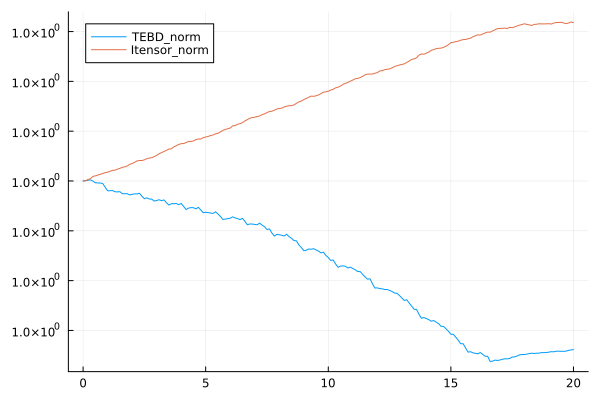

GKS: Possible loss of precision in routine SET_WINDOW


In [12]:
norma_TEBD = readdlm("Data/normCheck_TEBD.dat",',', Float64, '\n');
norma = readdlm("Data/normCheck.dat",',', Float64, '\n');
tv=readdlm("Data/tv_TEBD.dat",'\n' ,Float64);
#println(norma)
plot(tv,norma_TEBD,label = "TEBD_norm")
plot!(tv,norma,label = "Itensor_norm")

### Confronto del valore di aspettazione di Sz(Z) con quello ottenuto tramite tMPS e Mathematica 

length(magMeas_ITensor) = 20301
length(magMeas) = 20301


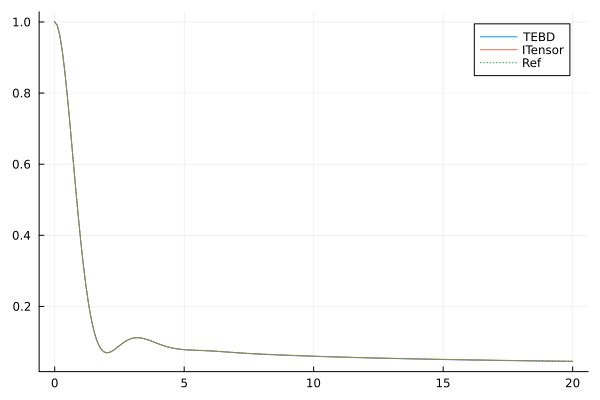

In [13]:
magMeas = readdlm("Data/magMeas_TEBD.dat",',', Float64, '\n');
tv=readdlm("Data/tv.dat",'\n' ,Float64);
magMeas_ITensor = readdlm("Data/magMeas.dat",',', Float64, '\n');
@show length(magMeas_ITensor)
@show length(magMeas)
plot(tv,0.5*(1 .+ magMeas[:,1]),label = "TEBD")
plot!(tv,0.5*(1 .+ magMeas_ITensor[:,1]),label = "ITensor")
mathData = readdlm("Data/math_data.csv",',' ,Float64); #è con 100 siti
timeData = readdlm("Data/times.csv", ',', Float64);
plot!(timeData,mathData[:,1],label="Ref",ls=:dot)

Controllo ortogonalità su tutti i siti intermedi (su una forma canonica A-sinistra)

In [12]:
for k in 1:length(GammasV)
    Gamma=GammasV[k]
    Lambda=LambdasV[k]
    psi_Left=MPS(length(Gamma))
    psi_Left[1]=Gamma[1]

    for i in 1:length(Lambda)
        psi_Left[i+1]=Lambda[i]*Gamma[i+1]
    end

    for i in 1:length(psi_Left)-1
    
        M = dag(psi_Left[i])
        prime!(M; tags="u=$(i)")
        #println("M $(inds(M))")
    
        result = psi_Left[i]*M
        indices=inds(result)
        identity= delta(indices) 

        if (result ≈ identity) 
            continue
            else println("error!")
        end

    #L'ultima non va contratta, non ha indice u e tecnicamente è l'ortho centre
    end
end

# Some strange behaviour

In [9]:
#MPS with not defined orthogonality
s0 = siteinds("S=1/2",20)
psi0 = randomMPS(s0;linkdims=20)
#linkdims is the bond dimension (maximum dimension of the bond index) 
#and can also be repr by a vector for different dimensions
#orthogonalize!(psi0,10) 
display(psi0.rlim)
norm(psi0)

2

0.9999999999999998

In [21]:
include("Lib/convert_to_Vidal.jl") # funziona solo se conserve_qns=false
Lambdas, Gammas = convert_to_Vidal(psi0)
@show length(Lambdas)
@show length(Gammas)

true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
length(Lambdas) = 19
length(Gammas) = 20


20

In [35]:
i = Index(2,"i")
j = Index(3,"j")

#A = randomITensor(i,j)

A = onehot(i=>1,j=>1)
A[j=>1,i=>1] = -3.2
A[j=>2,i=>2] = -3.2
@show A

ide = delta(inds(A))
@show ide

# Multiply every element of `A` by 2.0:
A .*= 2.0

B = diag_itensor(inds(A))
B1 = ITensor(inds(A))
@show B
B .= A .^(-1)
B1 .= inv.(A)

@show B1

for iv in eachindval(i, j)
  if (B[iv...] == Inf) B[iv...] =0
    end
end

@show B
@show ide * ide
@show B1*A ≈ ide * ide

C = prime(B;tags="i")
@show C
@show B
@show A*C
indices = noncommoninds(A,C)
iden=delta(indices)
@show C*A ≈ iden

A = ITensor ord=2
Dim 1: (dim=2|id=855|"i")
Dim 2: (dim=3|id=799|"j")
NDTensors.Dense{Float64, Vector{Float64}}
 2×3
 -3.2   0.0  0.0
  0.0  -3.2  0.0
ide = ITensor ord=2
Dim 1: (dim=2|id=855|"i")
Dim 2: (dim=3|id=799|"j")
NDTensors.Diag{Float64, Float64}
 2×3
 1.0  0.0  0.0
 0.0  1.0  0.0
B = ITensor ord=2
Dim 1: (dim=2|id=855|"i")
Dim 2: (dim=3|id=799|"j")
NDTensors.Diag{Float64, Vector{Float64}}
 2×3
 0.0  0.0  0.0
 0.0  0.0  0.0
B1 = ITensor ord=2
Dim 1: (dim=2|id=855|"i")
Dim 2: (dim=3|id=799|"j")
NDTensors.Dense{Float64, Vector{Float64}}
 2×3
 -0.15625  Inf       Inf
 Inf       -0.15625  Inf
B = ITensor ord=2
Dim 1: (dim=2|id=855|"i")
Dim 2: (dim=3|id=799|"j")
NDTensors.Dense{Float64, Vector{Float64}}
 2×3
 -0.15625   0.0      0.0
  0.0      -0.15625  0.0
ide * ide = ITensor ord=0
NDTensors.Diag{Float64, Float64}
 0-dimensional
2.0
B1 * A ≈ ide * ide = false
C = ITensor ord=2
Dim 1: (dim=2|id=855|"i")'
Dim 2: (dim=3|id=799|"j")
NDTensors.Dense{Float64, Vector{Float64}}
 2×3
 -0.1

true

In [26]:
@show Lambdas[3]

Lambdas[3] = ITensor ord=2
Dim 1: (dim=8|id=710|"u=3")
Dim 2: (dim=8|id=180|"v=3")
NDTensors.Diag{Float64, Vector{Float64}}
 8×8
 0.5949292125715213  0.0                 0.0                0.0                 0.0                  0.0                  0.0                  0.0
 0.0                 0.4636461550419205  0.0                0.0                 0.0                  0.0                  0.0                  0.0
 0.0                 0.0                 0.414359103079624  0.0                 0.0                  0.0                  0.0                  0.0
 0.0                 0.0                 0.0                0.3449622204104384  0.0                  0.0                  0.0                  0.0
 0.0                 0.0                 0.0                0.0                 0.23808047565233764  0.0                  0.0                  0.0
 0.0                 0.0                 0.0                0.0                 0.0                  0.18851625317647694  0.0           

ITensor ord=2 (dim=8|id=710|"u=3") (dim=8|id=180|"v=3")
NDTensors.Diag{Float64, Vector{Float64}}

In [27]:
A=Lambdas[3]
B = diag_itensor(inds(A))
B .= A .^(-1)
@show B
C = prime(B, commonind(A,B))
@show A*C

ITensor ord=2 (dim=8|id=710|"u=3") (dim=8|id=180|"v=3")
NDTensors.Diag{Float64, Vector{Float64}}